In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [2]:
dataset={'k':[[1,2],[2,3],[3,2]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
for group in dataset:
    for feature in dataset[group]:
        print(feature)

[1, 2]
[2, 3]
[3, 2]
[6, 5]
[7, 7]
[8, 6]


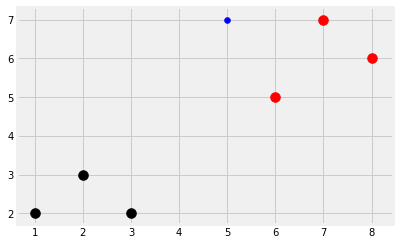

In [3]:
#plotting the dataset
[[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],color = 'b')
plt.show()
#so this blue pt should go to which cluster

In [4]:
def k_nn(data, predict, k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances=[]
    for group in data:
        for feature in data[group]:
            euclidean_distance = 0
            for e,f in zip(feature,predict):
                euclidean_distance += sqrt((e-f)**2)
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    
    #print(Counter(votes).most_common(1))
    confidence = Counter(votes).most_common(1)[0][1]/k
    vote_result = Counter(votes).most_common(1)[0][0]
        
    return vote_result

In [5]:
result = k_nn(dataset, new_features, k=3)
print(result)

r


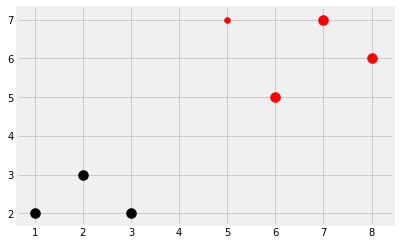

In [6]:
#plotting the result
[[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],color=result)
plt.show()

In [7]:
#hence it belong to red cluster or group

In [8]:
#Running our algo on cancer dataset
import pandas as pd
import random

In [9]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999,inplace=True)
df.drop(['Id'],1,inplace=True)
#now we will convert orignal data into list
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
print(len(full_data))

699


In [10]:
test_size = 0.2
#now we will create a dictionary jaise upar kara tha
train_set = {2:[], 4:[]}#2 and 4 are two different clusters(malignant or benign)
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [11]:
for i in train_data:
    train_set[i[-1]].append(i[:-1]) #since i[-1] gives 2 or 4 from train_data

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [17]:
correct = 0
total = 0
i=2
if i?2:4: color='r' else: color ='b'
print(color)

SyntaxError: invalid syntax (<ipython-input-17-4f1418c4ded0>, line 4)

In [13]:
for group in test_set:
    for data in test_set[group]:
        vote = k_nn(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9712230215827338
